### Problem Statement

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

### Importing the libraries

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')  # Supressing the warnings

### Loading the Dataset

In [251]:
df=pd.read_csv('Automobile_insurance_fraud.csv') #Storing the data into dataframe named as df

In [252]:
df.shape

(1000, 40)

Dataset have 1000 rows and 40 columns

In [253]:
df.size

40000

Dataset has total in 40000 elements.

In [254]:
# Printing the first five rows of the dataframe.
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [255]:
# Printing the last 5 data points
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [256]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

We can see that there are object,integer and float datatypes in dataset.

### Checking for missing values

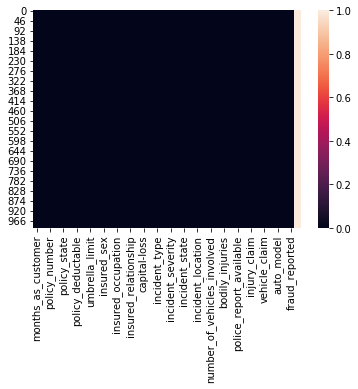

In [257]:
# Checking for any missing valules in dataset
sn.heatmap(df.isnull())

The above graph shows if there are missing values in the dataset black color shows the '0' value here, it means that none of the value is empty.

In [258]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We can see that there 1000 missing values in column name _c39 so we can handle it by dropping the column.

In [259]:
#Dropping the column _c39
df.drop("_c39", axis=1,inplace=True)

In [260]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

### Chekcing for '?' value in the dataset

In [261]:
df.isin(['?']).sum().sum()

881

There are total 881 field having '?' values.

In [262]:
df.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

The Columns colision_type,property_damage, and police_report_available have '?' values which needs to be preprocessed.  

In [263]:
#Handling the missing values in the dataset
#Replacing with null value
df=df.replace('?', np.nan)

In [264]:
column_nan = ['collision_type', 'property_damage', 'police_report_available']

#### Replacing the missing values in column_nan with highest frequency count of categories in each class using mode method.¶

In [265]:
for col in column_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [266]:
df.isnull().sum().sum()

0

#### Finally there are no missing values nor nan nor ' ?' in dataset.

In [267]:
#Statistical summary of the data
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


The total count in the dataset is 1000 , Average age is 38 years and maximum age is 64years, Also we could see that the average total claim amount is 52761 and maximum claim amount is 114920. we could detect other variables too that is income of the customer , monthly premium of the auto for which the insurance have been taken.

### EDA(Exploratory Data Anaylsis)

#### Univariate Anaylsis

In [268]:
#List all the 39 columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [269]:
# Storing all the numerical data columns
numerical=list(df.select_dtypes(['int64','float64']))

In [270]:
# Storing all the categorical data columns
categorical=list(df.select_dtypes(['object']))

In [271]:
len(numerical)

18

In [272]:
len(categorical)

21

#### Plotting Distribution Plot

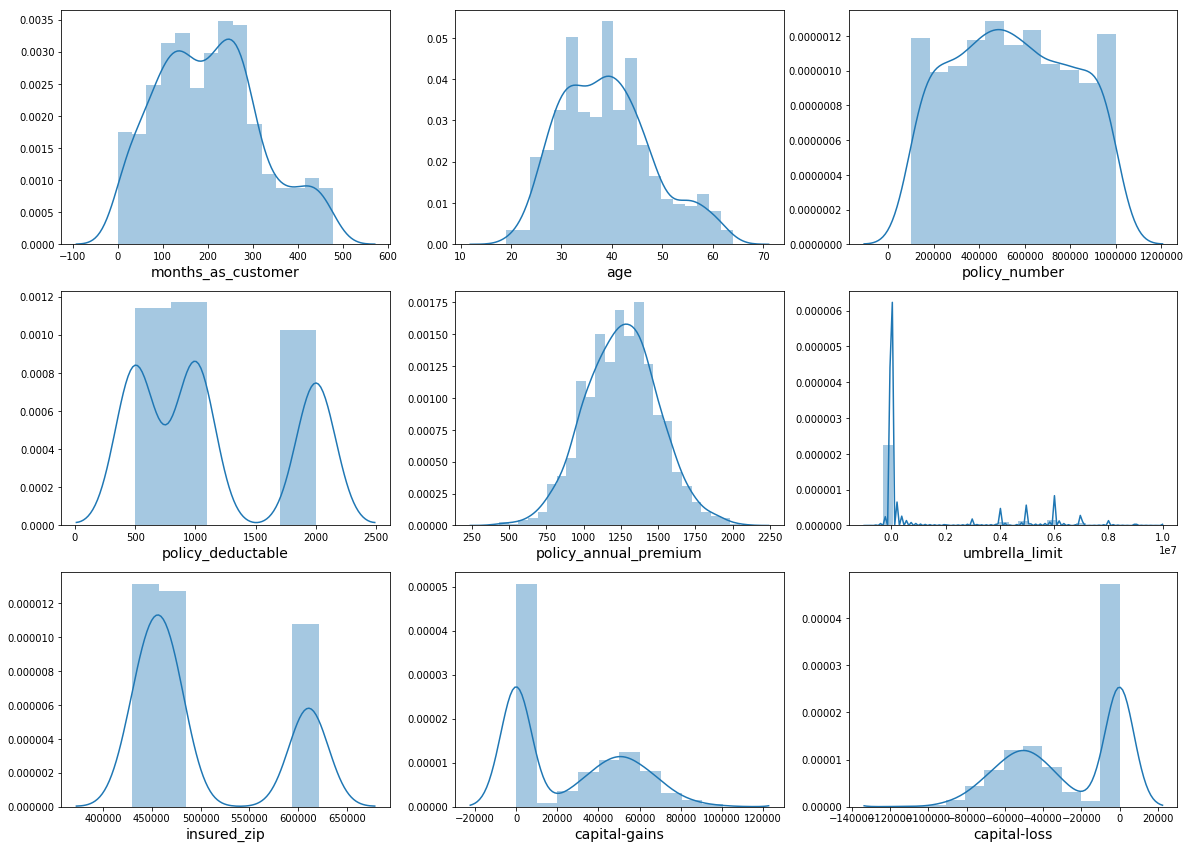

In [273]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df[numerical]:
    if plotnumber<=9:
        ax=plt.subplot(5,3,plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
plt.show()

The above plot shows that most of the columns shows skewed distribution, column umbrella_limit shows right skewed distribution plot whereas column such as month_as_customer,age,policy_number shows less skewed more like normal distribution graph.The Policy_annual_premium shows perfect normal distribution graph.

#### Identifying the outliers

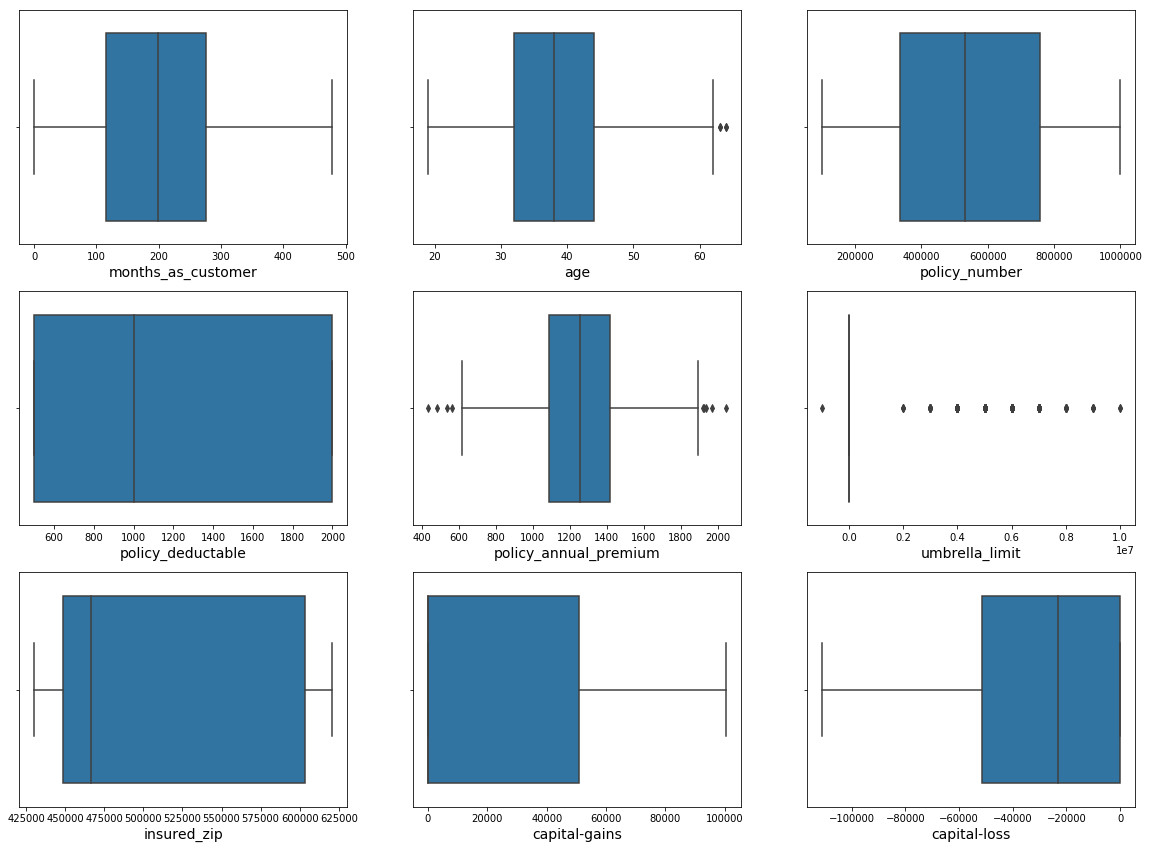

In [274]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df[numerical]:
    if plotnumber<=9:
        ax=plt.subplot(5,3,plotnumber)
        sn.boxplot(df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
plt.show()

The above graph shows that age,policy_annual_premium and umbrealla limit contains outliers which needs to be treated.

In [275]:
# Finding unique values of each column
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Policy Number,incident location contains 1000 unique values and we total in 1000 records, certainly they won't be useful in predicting fraud

In [276]:
#Target Variable
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

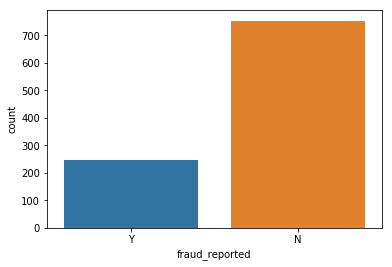

In [277]:
sn.countplot(df['fraud_reported'])

Number of fraud reported are very less as compared to No, so it is class imbalanced problem.

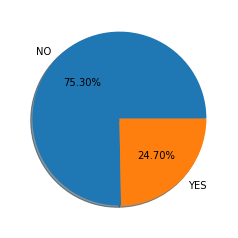

In [278]:
# Pie chart for class variable Loan Status
labels='NO','YES'
fig,ax=plt.subplots()
ax.pie(df['fraud_reported'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

There are 25% of fraud reported cases and 75% accounts for no fraud reported cases so we need to handle class imbalanced problem for better model result

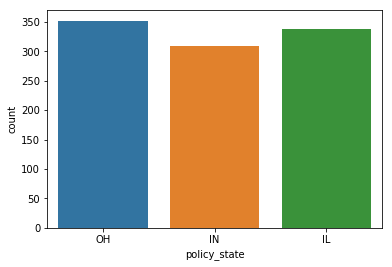

In [279]:
#policy state
sn.countplot(df['policy_state'])

we can see there almost equal distribution in all the states.

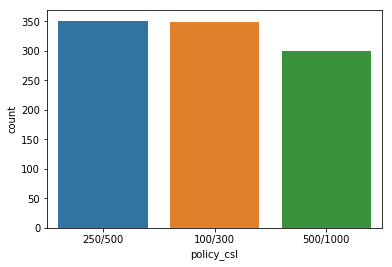

In [280]:
#Policy csl
sn.countplot(df['policy_csl'])

There is almost equal distribution in all three policy_csl.

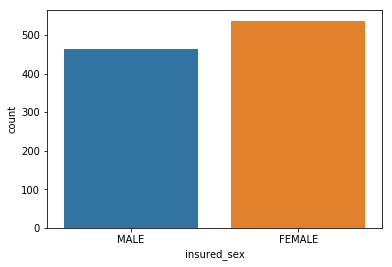

In [281]:
#insured_sex
sn.countplot(df['insured_sex'])

Thre are slighlty more number of female as compared to male who are insured.

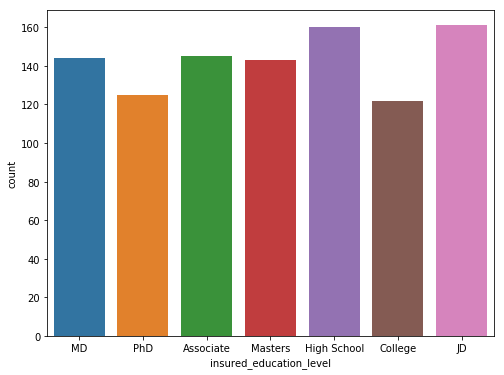

In [282]:
#insured education level
plt.figure(figsize=(8,6))
sn.countplot(df['insured_education_level'])

High school student and JD education level shows highest count of Insured persons.

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text xticklabel objects>)

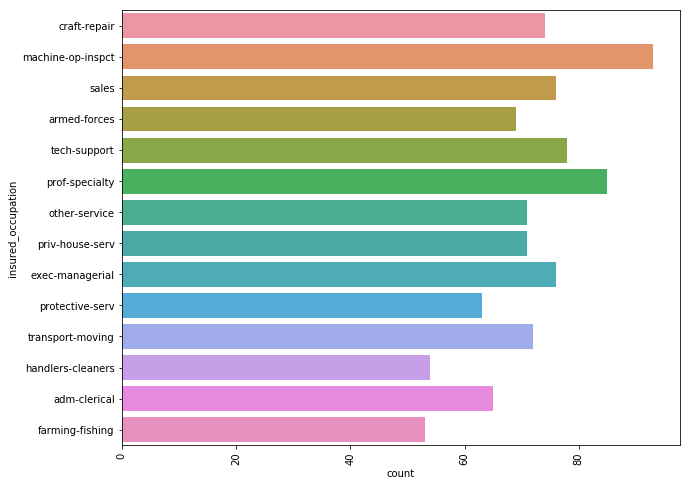

In [283]:
#insured occupation
plt.figure(figsize=(10,8))
sn.countplot(y='insured_occupation',data=df)
plt.xticks(rotation=90)

The above plot shows the different occupation of insured peoples, where machine operation insepector as occupation shows highest count.

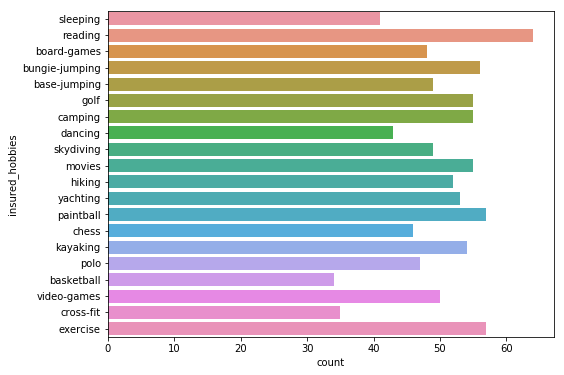

In [284]:
#insured hobbies
plt.figure(figsize=(8,6))
sn.countplot(y='insured_hobbies',data=df)

Reading,Excercise and Paintball shows the maximum count of Insured customers hobbies.

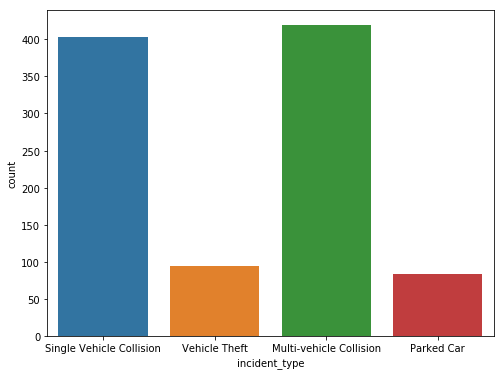

In [285]:
#incident type
plt.figure(figsize=(8,6))
sn.countplot(df['incident_type'])

From the above plot we can say that ,Most of the insured claim cases comes under Single and Multi Vehicle Collision.
Vehicle Theft and Parked Car cases are very low.

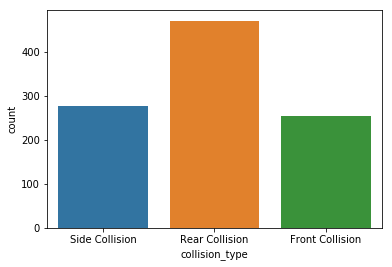

In [286]:
#collision type
sn.countplot(df['collision_type'])

Most number of Rear collision happened and Side Collsion and Front Collision are in equal distribution. 

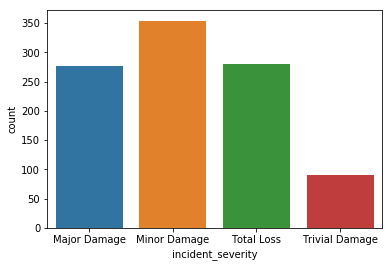

In [287]:
#incidient Severity
sn.countplot(df['incident_severity'])

Most of the claim include minor damage to the vehicle and very less vehicle has trivial damage

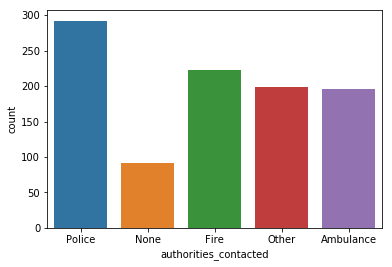

In [288]:
#Authorities Contacted 
sn.countplot(df['authorities_contacted'])

More number of people contacted police authorities as compared to other authorities. 

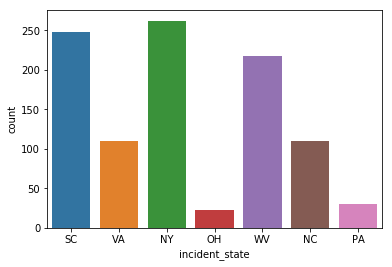

In [289]:
#Incident state
sn.countplot(df['incident_state'])

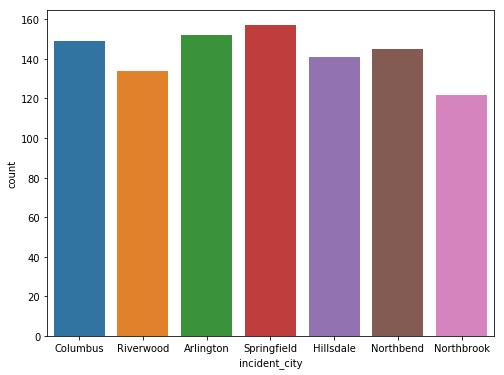

In [290]:
#Incident City
plt.figure(figsize=(8,6))
sn.countplot(df['incident_city'])

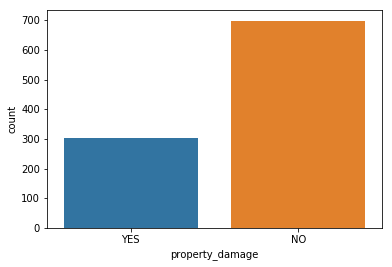

In [291]:
#Property Damage
sn.countplot(df['property_damage'])

There are very few count of property damage

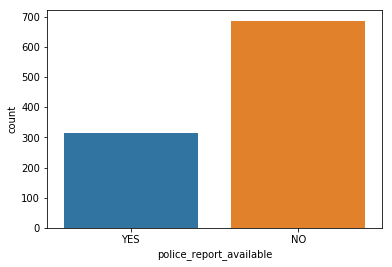

In [292]:
#Police report available
sn.countplot(df['police_report_available'])

Number of people who lodged police report are less as comapared to them who didn't.

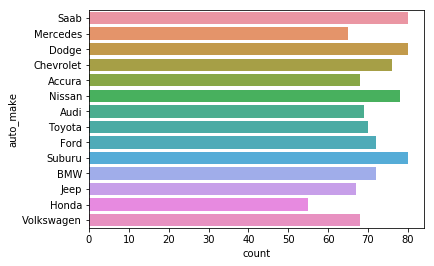

In [293]:
#auto make
sn.countplot(y='auto_make',data=df)

Most number of vehicle are from this comnpanies Saab,Dodge, Nissan and Suburu.

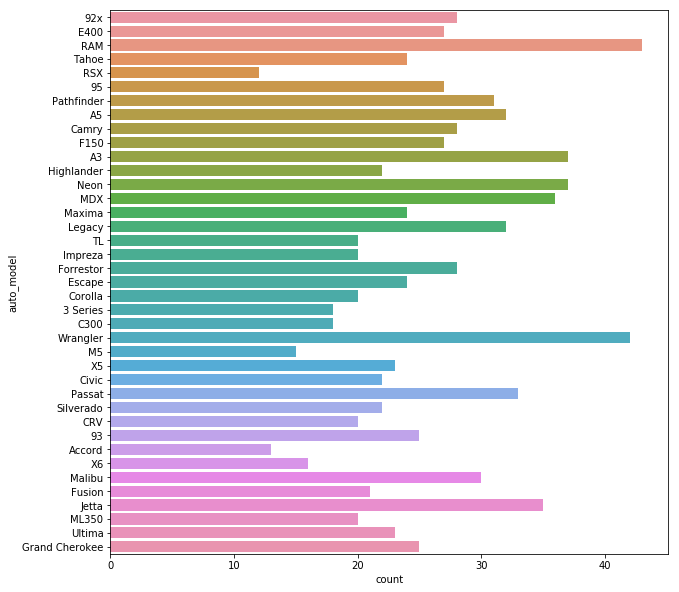

In [294]:
#Auto Model
plt.figure(figsize=(10,10))
sn.countplot(y='auto_model',data=df)

Most of the vehicle are from two models which are RAM and Wrangler.

In [301]:
df.keys()

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

### Bivariate Anaylsis

<Figure size 1152x720 with 0 Axes>

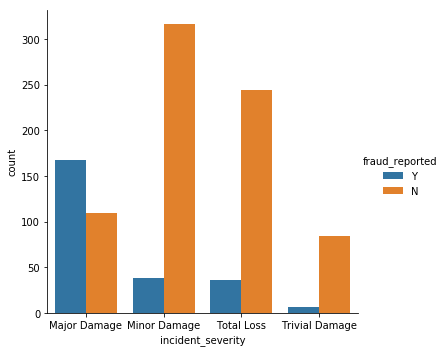

In [349]:
plt.figure(figsize=(16,10))
sn.factorplot(x='incident_severity',kind='count',data=df,hue='fraud_reported')

From the above plot it can be observed that the vehicle which had major damage reported highest number of fraud. 

<Figure size 1152x720 with 0 Axes>

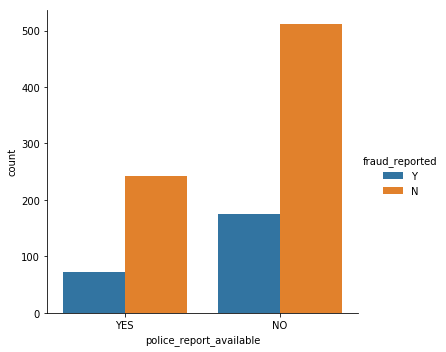

In [350]:
plt.figure(figsize=(16,10))
sn.factorplot(x='police_report_available',data=df,kind='count',hue='fraud_reported')

Majority of fruad cases does not have police report available.

<Figure size 1152x720 with 0 Axes>

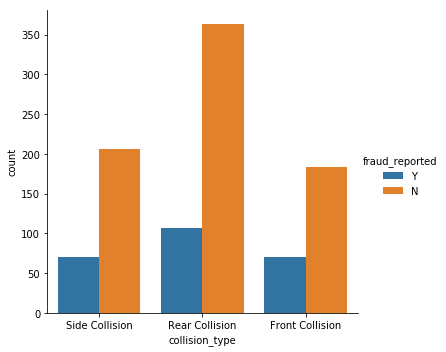

In [318]:
plt.figure(figsize=(16,10))
sn.factorplot(x='collision_type',data=df,kind='count',hue='fraud_reported')

Rear Collision are highest in count showing that there is almost equal distribution of fraud reported cases in all three collision type.

<Figure size 1152x720 with 0 Axes>

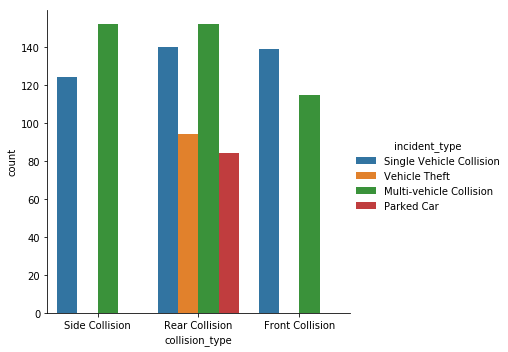

In [335]:
plt.figure(figsize=(16,10))
sn.factorplot(x='collision_type',data=df,kind='count',hue='incident_type')

The incident of vehile theft and Parked only occured in Rear collision accident.

<Figure size 1152x720 with 0 Axes>

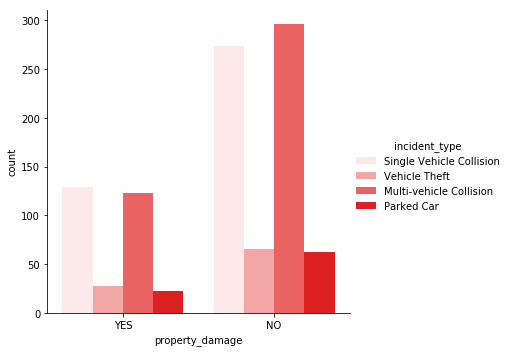

In [336]:
plt.figure(figsize=(16,10))
sn.factorplot(x='property_damage',data=df,kind='count',hue='incident_type',color='red')

The Vehicle suffered from single collision and multi collision caused more property damage as compared to other incidents.

<Figure size 1152x720 with 0 Axes>

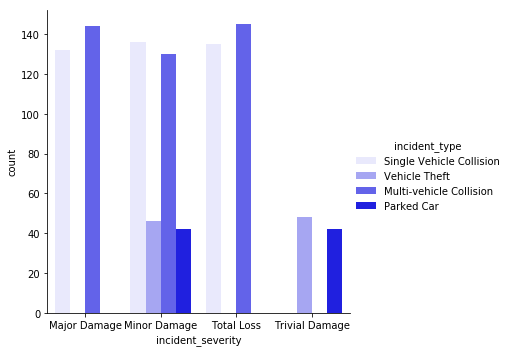

In [332]:
plt.figure(figsize=(16,10))
sn.factorplot(x='incident_severity',data=df,kind='count',hue='incident_type',color='blue')

There is minor damage to vehicle in all types of incident whereas Trivial Damage cause to the customer is in Vehicle theft and Parked car

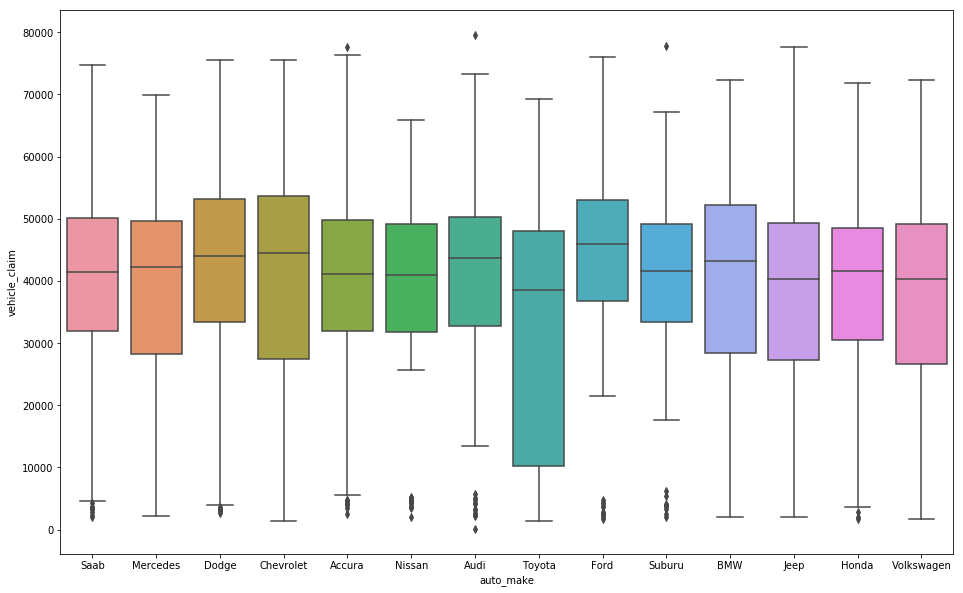

In [341]:
plt.figure(figsize=(16,10))
sn.boxplot(x='auto_make',y='vehicle_claim',data=df)

The above plot shows the relationship between different auto models and vehicle insured claim. Based upon outliers we can see that the highest and lowest vehcile claim is made by Audi model. 

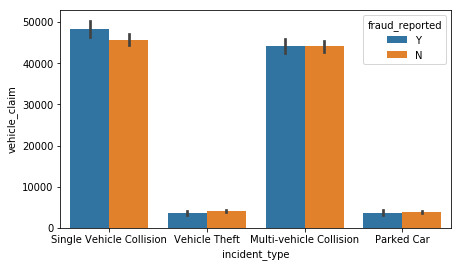

In [312]:
plt.figure(figsize=(7,4))
sn.barplot(df['incident_type'],df['vehicle_claim'],hue=df['fraud_reported'])

- Single and Mutli vehicle collision shows the highest vehcile claim.
- Claim amount for Vehicle Theft and Parked Car is very less. 

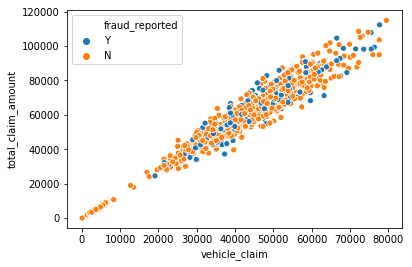

In [352]:
#plt.figure(figsize=(16,10))
sn.scatterplot(df['vehicle_claim'],df['total_claim_amount'],hue=df['fraud_reported'])

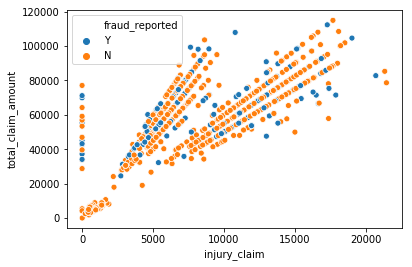

In [353]:
#plt.figure(figsize=(16,10))
sn.scatterplot(df['injury_claim'],df['total_claim_amount'],hue=df['fraud_reported'])

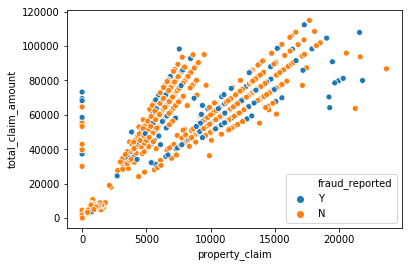

In [354]:
#plt.figure(figsize=(16,10))
sn.scatterplot(df['property_claim'],df['total_claim_amount'],hue=df['fraud_reported'])

- We can see that total_claim_amount shows strong positive correlation with annual premium,injury_claim and Vehicle claim.
- One thing can be noticed here that total_claim amount is just result of all the above mentioned claim so thats why they are correlating with each other. 

### Label Encoding 

In [97]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object': # encoding all categorical columns
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0


In [98]:
#Dropping the uncessary columns
df.drop(["policy_number","auto_year","number_of_vehicles_involved",'capital-loss'], axis = 1, inplace = True)

### Mutlivariate Anaylsis

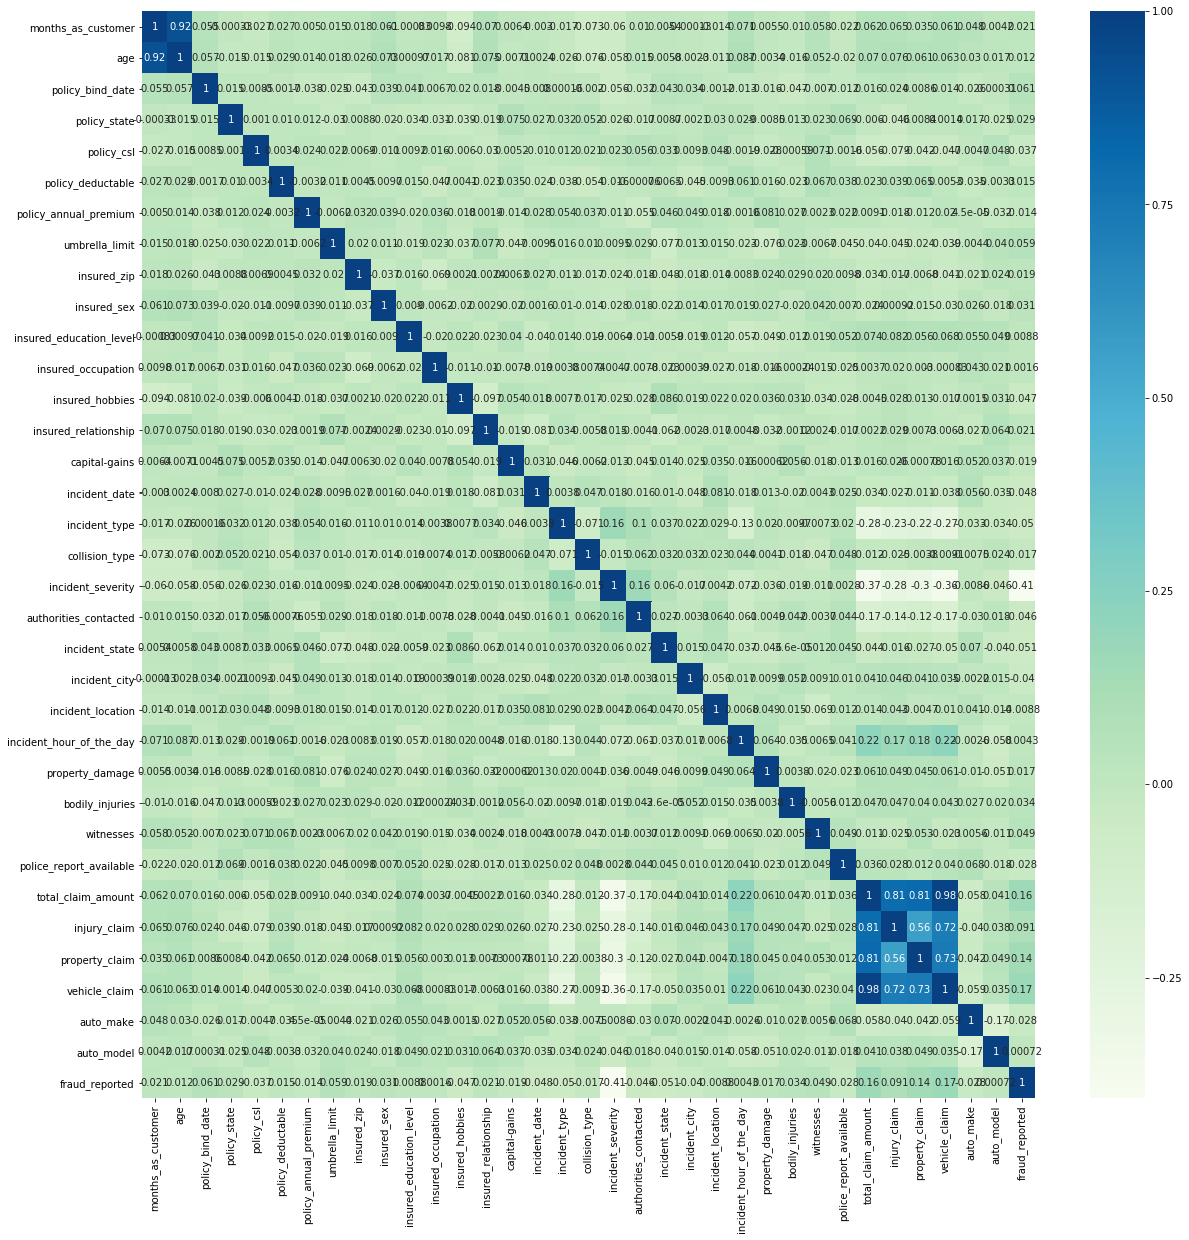

In [99]:
corr_hmap=df.corr()
plt.figure(figsize=(20,20))
sn.heatmap(corr_hmap,annot=True,cmap='GnBu')
plt.show()

- From the above plot, we can see that there is high correlation between age and months_as_customer.
-  There is high correlation between total_clam_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others

In [102]:
# Checking the correalation values in descending order
corr_hmap['fraud_reported'].sort_values(ascending=False)

fraud_reported              1.000000
vehicle_claim               0.170049
total_claim_amount          0.163651
property_claim              0.137835
injury_claim                0.090975
policy_bind_date            0.060642
umbrella_limit              0.058622
witnesses                   0.049497
bodily_injuries             0.033877
insured_sex                 0.030873
policy_state                0.029432
insured_relationship        0.021043
months_as_customer          0.020544
insured_zip                 0.019368
property_damage             0.017202
policy_deductable           0.014817
age                         0.012143
insured_education_level     0.008808
incident_hour_of_the_day    0.004316
insured_occupation          0.001564
auto_model                  0.000720
incident_location          -0.008832
policy_annual_premium      -0.014480
collision_type             -0.017315
capital-gains              -0.019173
auto_make                  -0.027519
police_report_available    -0.027768
p

In [77]:
categorical

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

### Removing the Outliers

In [131]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [132]:
df.shape

(1000, 35)

In [133]:
new_df.shape

(981, 35)

In [134]:
# Data loss percentage
Data_loss=(df.shape[0]-new_df.shape[0])/df.shape[0]*100
Data_loss

1.9

After removing the outliers from the data the shape of the data has change from (1000,35) to (981,35) which shows that with the z score method we are able to remove various rows with lossing about 1.9 percent of data , Hence our new data shape is (981,35)

### Checking for Skewness

In [135]:
new_df.skew()

months_as_customer          0.363268
age                         0.475942
policy_bind_date            0.004864
policy_state               -0.038101
policy_csl                  0.098092
policy_deductable           0.473431
policy_annual_premium       0.034884
umbrella_limit              1.803065
insured_zip                 0.838685
insured_sex                 0.141238
insured_education_level     0.006225
insured_occupation         -0.057292
insured_hobbies            -0.060134
insured_relationship        0.076242
capital-gains               0.465985
incident_date               0.003842
incident_type               0.092461
collision_type             -0.032704
incident_severity           0.278443
authorities_contacted      -0.112301
incident_state             -0.147048
incident_city               0.042537
incident_location          -0.002655
incident_hour_of_the_day   -0.038146
property_damage             0.854687
bodily_injuries             0.001877
witnesses                   0.024567
p

There is no skeweness in the above data

### Splitting the data into input and target variables

In [187]:
from sklearn.model_selection import train_test_split
x = new_df.drop(['fraud_reported'], axis = 1)
y=new_df["fraud_reported"]

In [189]:
print(x.shape)
x.head()

(981, 34)


,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model
0,328,48,532,2,1,1000,1406.91,0,466132,1,...,1,1,2,1,71610,6510,13020,52080,10,1
1,228,42,821,1,1,2000,1197.22,5000000,468176,1,...,0,0,0,0,5070,780,780,3510,8,12
2,134,29,186,2,0,2000,1413.14,5000000,430632,0,...,0,2,3,0,34650,7700,3850,23100,4,30
3,256,41,766,0,1,2000,1415.74,6000000,608117,0,...,0,1,2,0,63400,6340,6340,50720,3,34
4,228,44,181,0,2,1000,1583.91,6000000,610706,1,...,0,0,1,0,6500,1300,650,4550,0,31


In [190]:
print(y.shape)
y.head()

(981,)


0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

### Handling Class Imbalanced problem by oversampling the minority class

In [191]:
from imblearn.over_sampling import SMOTE
SM =SMOTE()
x_over, y_over = SM.fit_resample(x, y)

In [192]:
y_over.value_counts()

1    741
0    741
Name: fraud_reported, dtype: int64

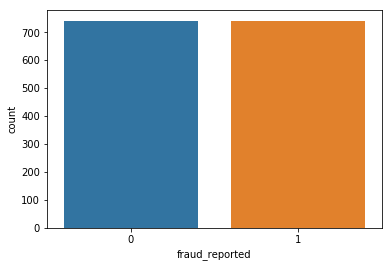

In [193]:
sn.countplot(y_over)

Now the class varible is balanced by using oversampling.

In [194]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,confusion_matrix,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

### Finding the best random state

In [195]:
from sklearn.linear_model import LogisticRegression
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.2,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best accuracy is",MaxAccu,'on random state',maxRS)

Best accuracy is 0.6599326599326599 on random state 183


### Create a train test split

In [206]:
# Splitting the dataset into trianing and testing data
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.2,random_state=maxRS)

### Standard Scaler Method

In [207]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

#### Logistic Regression

Accuracy score using logistic regression model is 79.7979797979798
Cross validation score 75.33098518595254
-----------------------------
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       134
           1       0.82      0.80      0.81       163

    accuracy                           0.80       297
   macro avg       0.80      0.80      0.80       297
weighted avg       0.80      0.80      0.80       297

-----------------------------

 Confusion Matrix


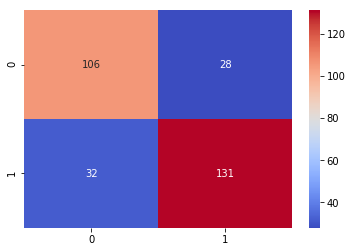

In [208]:
#Using logistic regression 
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
lr_acc=accuracy_score(y_test,pred)
print('Accuracy score using logistic regression model is',lr_acc*100)
lr_cv=cross_val_score(classifier,x,y,cv=5).mean()
print("Cross validation score",lr_cv*100)
print('-----------------------------')
lr_acc1=classification_report(y_test,pred)
print(lr_acc1)
con_mat = confusion_matrix(y_test,pred)
print('-----------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")


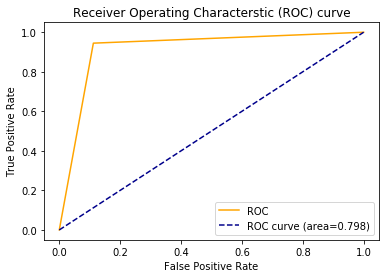

In [295]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% lr_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Decision Tree Classifier

Accuracy of Decision Tree classification is  78.45117845117845
Cross validation score 76.25090645395214
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       134
           1       0.81      0.80      0.80       163

    accuracy                           0.78       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.78      0.78      0.78       297


 Confusion Matrix


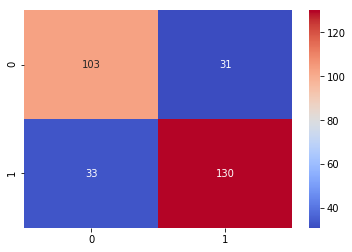

In [233]:
# Using Decision Tree Classification algorithm
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
dtc_acc=accuracy_score(y_test,pred)
print("Accuracy of Decision Tree classification is ",dtc_acc*100)
dtc_cv=cross_val_score(DTC,x,y,cv=5).mean()
print("Cross validation score",dtc_cv*100)
#Printing confusion matrix
con_mat = confusion_matrix(y_test,pred)
dtc_acc1=classification_report(y_test,pred)
print(dtc_acc1)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

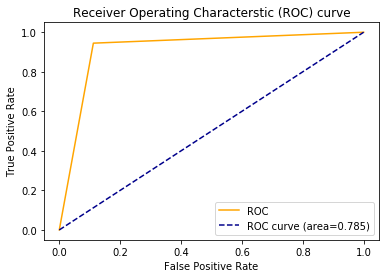

In [296]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% dtc_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Support Vector Classifier

Accuracy of Support Vector Classification is  85.18518518518519
Cross validation score 75.5350668186056
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       134
           1       0.91      0.81      0.86       163

    accuracy                           0.85       297
   macro avg       0.85      0.86      0.85       297
weighted avg       0.86      0.85      0.85       297


 Confusion Matrix


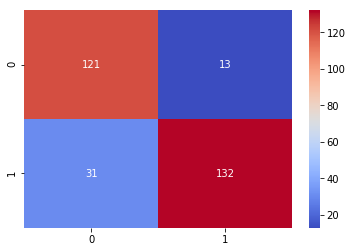

In [234]:
#Using Support vector classification
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
svc_acc=accuracy_score(y_test,pred)
print("Accuracy of Support Vector Classification is ",svc_acc*100)
svc_cv=cross_val_score(svc,x,y,cv=5).mean()
print("Cross validation score",svc_cv*100)
svc_acc1=classification_report(y_test,pred)
print(svc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

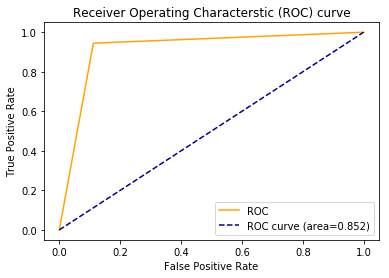

In [297]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% svc_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Random Forest Classifier

Accuracy of Random Forest Classificarion is  88.88888888888889
Cross validation score 78.18398425359992
-------------------------------
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       134
           1       0.91      0.88      0.90       163

    accuracy                           0.89       297
   macro avg       0.89      0.89      0.89       297
weighted avg       0.89      0.89      0.89       297

-------------------------------

 Confusion Matrix


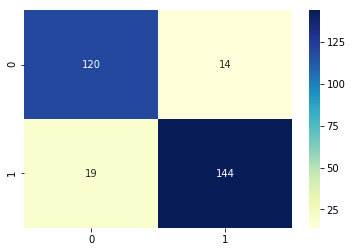

In [210]:
#Using random forest classification
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier() # creating instance of class
RF.fit(x_train,y_train) #Fitting the data
pred=RF.predict(x_test) # Predicting the data 
rfc_acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classificarion is ",rfc_acc*100)
rfc_cv=cross_val_score(RF,x,y,cv=5).mean()
print("Cross validation score",rfc_cv*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

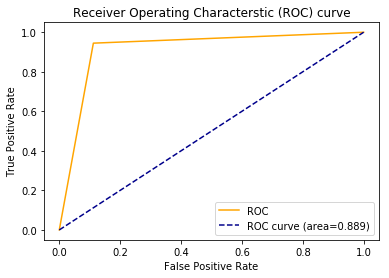

In [298]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% rfc_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

#### Gradient Boosting Classifier

Accuracy score using gradient boosting classifier model is 85.85858585858585
Cross validation score 83.79260333575054
-------------------------------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       134
           1       0.90      0.84      0.87       163

    accuracy                           0.86       297
   macro avg       0.86      0.86      0.86       297
weighted avg       0.86      0.86      0.86       297

-------------------------------

 Confusion Matrix


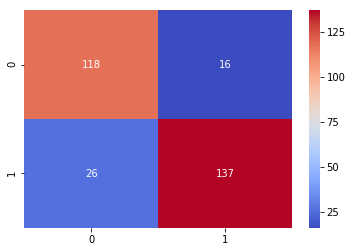

In [230]:
### using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=25)
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
gbc_acc=accuracy_score(y_test,pred)
print('Accuracy score using gradient boosting classifier model is',gbc_acc*100)
gbc_cv=cross_val_score(clf,x,y,cv=5).mean()
print("Cross validation score",gbc_cv*100)
print('-------------------------------')
gbc_acc1=classification_report(y_test,pred)
print(gbc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sn.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

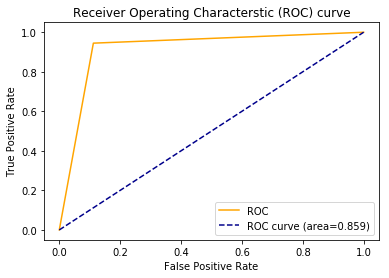

In [299]:
fpr,tpr,thresholds=roc_curve(y_test,pred)
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% gbc_acc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [239]:
#Storing the model
model=['Logistic Regression','Decision Tree Classifier','Support Vector Classifier','Random Forest Classifier','Gradient boosting Classifier']

acc=[lr_acc*100,dtc_acc*100,svc_acc*100,rfc_acc*100,gbc_acc*100]

cv_score=[lr_cv*100,dtc_cv*100,svc_cv*100,rfc_cv*100,gbc_cv*100]
diff=[acc[0]-cv_score[0],acc[1]-cv_score[1],acc[2]-cv_score[2],acc[3]-cv_score[3],acc[4]-cv_score[4]]
diff
result=pd.DataFrame({'Model':model,'Accuracy_score':acc,'Cross Validation_score':cv_score,'Difference':diff})
result

,Model,Accuracy_score,Cross Validation_score,Difference
0,Logistic Regression,79.797980,75.330985,4.466995
1,Decision Tree Classifier,78.451178,76.250906,2.200272
2,Support Vector Classifier,85.185185,75.535067,9.650118
3,Random Forest Classifier,88.888889,78.183984,10.704905
4,Gradient boosting Classifier,85.858586,83.792603,2.065983


### Choosing the model

Randome Forest Classifier gives accuracy score of 88.88% but cross validation difference is 10 whereas in Gradient Boosting Classifier gives accuracy of nearly 86% but cross validation difference is 2, So I am going to choose gradient boosting classifier as best model.

### Applying hyperparameter to the best accuracy model

In [240]:
parameters= {
    'n_estimators':[300,500],
    'max_depth': [8,12],
    'criterion':['friedman_mse', 'mse'],
    'learning_rate':[0.2,0.3]
    }

In [241]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [242]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.2, 0.3], 'max_depth': [8, 12],
                         'n_estimators': [300, 500]})

In [243]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.2,
 'max_depth': 8,
 'n_estimators': 300}

In [244]:
Final_model=GradientBoostingClassifier(n_estimators= 300,criterion='friedman_mse',learning_rate=0.2,max_depth=8)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc_final=accuracy_score(y_test,pred)
print("Accuracy of the model using Gradient boosting classifier is ",acc_final*100)

Accuracy of the model using Gradient boosting classifier is  91.91919191919192


#### With hyperparameter tuning model accuracy has increased from 86. to 92 percent approximately.

### Plotting ROC curve

In [245]:
# Plotting Roc curve and roc_auc value for predcited probabalities
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [246]:
#Receiver operator charactersitics(ROC)
fpr,tpr,thresholds=roc_curve(y_test,pred)

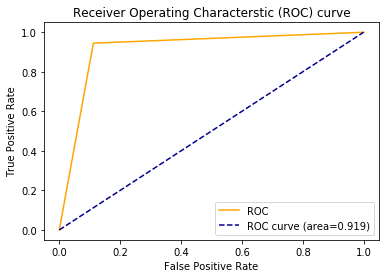

In [247]:
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% acc_final)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend()
plt.show()

### Saving the Model

In [248]:
import joblib
import sys
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.externals import joblib

In [249]:
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']